# Linear Regression Model

### Importing the relevant libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
import seaborn as sns
sns.set()

## Importing the preprocessed and clean data

In [176]:
data_preprocessed = pd.read_csv("car-price-data-preprocessed.csv")

### Declare inputs and target

In [179]:
target = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data
to balance the impact of all variables we should scale our data

In [182]:
# StandardScaler in sklearn.preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(inputs)
#transforming the inputs to scaled inputs
inputs_scaled = scaler.transform(inputs)

### Train and test
80-20 split to our data

In [185]:
# train test split in model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(inputs_scaled, target, test_size=0.2, random_state=42)

## Regression Model
Linear Regression Model (OLS) with sklearn

In [188]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

### R-squared and adjusted R-squared

In [191]:
r2 = reg.score(x_train,y_train)
r2

0.7546487921881216

In [193]:
n = len(y_train)  
p = x_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.7532923790067226

### Finding the weights and bias

In [196]:
reg.intercept_

9.421003614148074

In [198]:
reg.coef_

array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

In [200]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


## check the regression model
we can plot the "y_hat" and "y_train" and compare them to 45-degree line

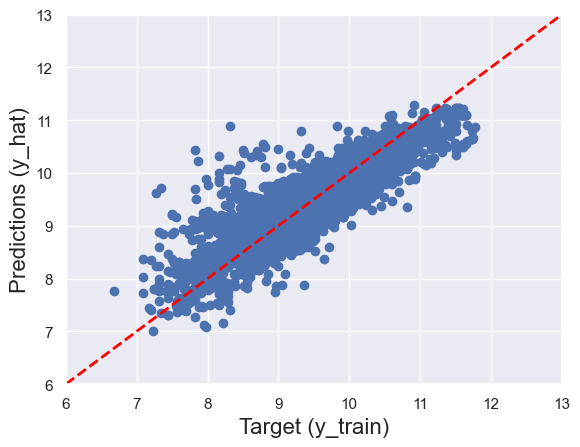

In [203]:
y_hat = reg.predict(x_train)
# plot the result
plt.scatter(y_train, y_hat)
plt.xlabel('Target (y_train)',size=16)
plt.ylabel('Predictions (y_hat)',size=16)
plt.xlim(6,13)
plt.ylim(6,13)
# adding 45 degree line
xmin, xmax = 6, 13
ymin, ymax = 6, 13  
plt.plot([xmin, xmax], [xmin, xmax], color='red', linestyle='--', linewidth=2)


plt.show()

### Residual plot

Text(0.5, 1.0, 'Residuals PDF')

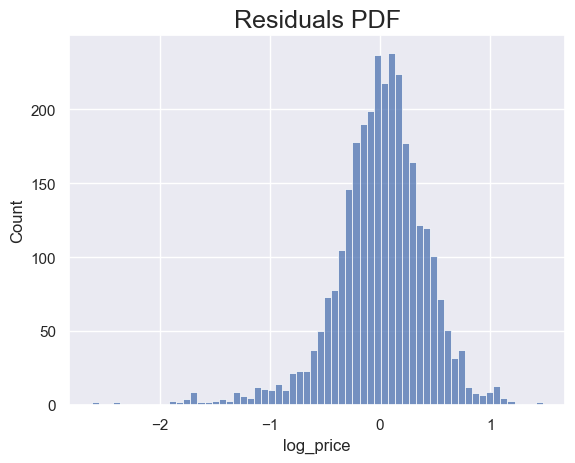

In [206]:
sns.histplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

## Testing

In [209]:
y_hat_test = reg.predict(x_test)

In [211]:
r2 = reg.score(x_test,y_test)
r2

0.7352752333232251

Text(0.5, 1.0, 'Residuals PDF')

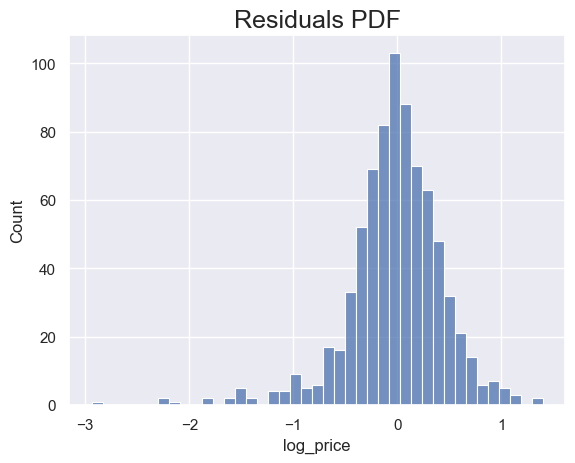

In [213]:
sns.histplot(y_test - y_hat_test)
plt.title("Residuals PDF", size=18)

In [215]:
test_df = pd.DataFrame(np.exp(y_hat_test) , columns =["Predictions"])
test_df.head()

,Predictions
0,40419.308971
1,7956.895960
2,5757.284408
3,9765.810605
4,7027.363814


In [217]:
test_df["Target"] = np.exp(y_test.reset_index(drop=True))
test_df.head()

,Predictions,Target
0,40419.308971,21300.0
1,7956.895960,8900.0
2,5757.284408,3250.0
3,9765.810605,12000.0
4,7027.363814,5400.0


In [219]:
test_df["Residual"] = test_df["Target"] - test_df["Predictions"]
test_df.head()

,Predictions,Target,Residual
0,40419.308971,21300.0,-19119.308971
1,7956.895960,8900.0,943.104040
2,5757.284408,3250.0,-2507.284408
3,9765.810605,12000.0,2234.189395
4,7027.363814,5400.0,-1627.363814


In [221]:
test_df['Difference%'] = np.absolute(test_df['Residual']/test_df['Target']*100)
test_df = test_df.sort_values(by=['Difference%'])
pd.options.display.max_rows = 999
test_df

,Predictions,Target,Residual,Difference%
387,13602.753468,13600.00,-2.753468,0.020246
74,28889.063628,28900.00,10.936372,0.037842
314,35530.207664,35500.00,-30.207664,0.085092
336,11313.265936,11300.00,-13.265936,0.117398
425,2995.676139,3000.00,4.323861,0.144129
262,52180.113403,52055.25,-124.863403,0.239867
674,3107.506596,3100.00,-7.506596,0.242148
648,9675.565748,9700.00,24.434252,0.251900
79,21407.589940,21335.00,-72.589940,0.340239
313,9865.724471,9900.00,34.275529,0.346217


In [223]:
test_df.describe()

,Predictions,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525
